In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from labellines import labelLine, labelLines

from abstractions import *
import statsmodels.api as sm

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:16<00:00,  6.10it/s]
/tmp/ipykernel_2001740/1705024182.py:38: RuntimeWarning: invalid value encountered in divide
  confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
/tmp/ipykernel_2001740/1705024182.py:39: RuntimeWarning: Mean of empty slice
  confidence_mean = np.nanmean(confidence, axis=0)
100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


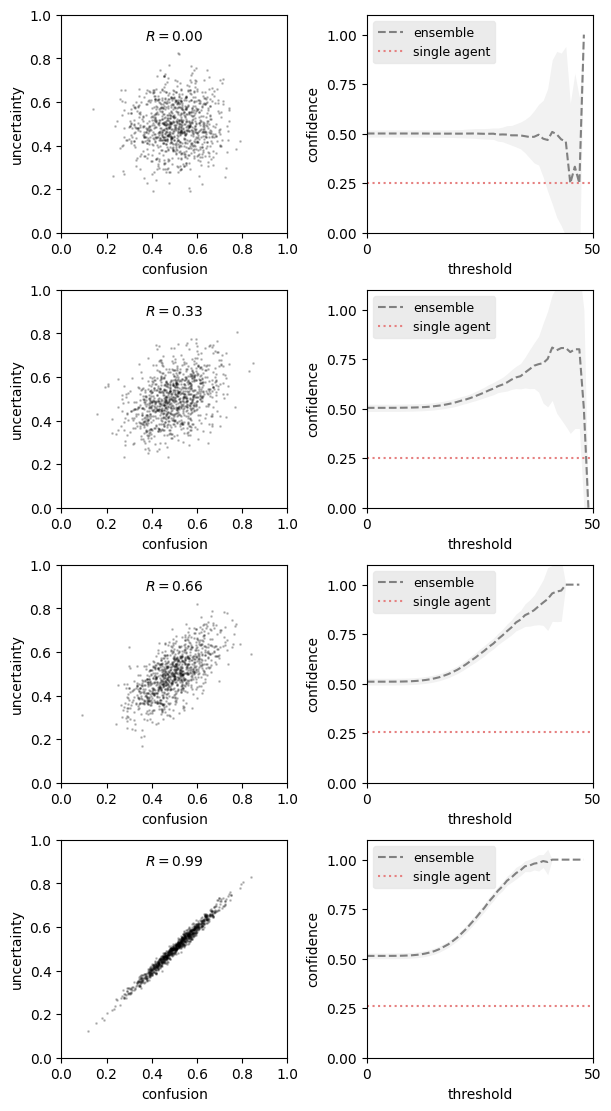

In [10]:
questions = 1000
agents = 50
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)

fig, ax = plt.subplots(4,2, figsize=(6,11), constrained_layout=True)

for i in range(4):
    running_vals = []
    ensemble_responses_list = []
    confusion = []
    uncertainty = []
    for j in tqdm.tqdm(range(100)):
        confusion_uncertainty_covariance = 0.01*np.array([[1,0.33 * i],[0.33 * i,1]])
        confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
        exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
        ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
        ensemble_responses = ensemble.take_exam(exam)
        values = [ensemble.vote_count(ensemble.vote(ensemble_responses, thresh)) for thresh in np.linspace(0, 1, thresholds)]
        running_vals.append(values)
        ensemble_responses_list.append(ensemble_responses)
        confusion.append(confusion_uncertainty[:,0])
        uncertainty.append(confusion_uncertainty[:,1])
        
    # Sample data
    confusion = list(np.array(confusion).flatten())
    uncertainty = list(np.array(uncertainty).flatten())
    confusion = sm.add_constant(confusion)
    model = sm.OLS(uncertainty, confusion).fit()

    # Print the summary
    # print(model.summary())
    r2 = model.rsquared

    mean_values = np.mean(np.array(running_vals), axis=0)

    confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
    confidence_mean = np.nanmean(confidence, axis=0)

    confidence_std = np.nanstd(confidence, axis=0)

    single_model_confidence = np.mean(np.where(np.array(ensemble_responses_list) == 1, 1, 0))
    single_model_confidence_std = np.std(np.where(np.array(ensemble_responses_list) == 1, 1, 0))

    ax[i,0].scatter(confusion_uncertainty[:,0], confusion_uncertainty[:,1], s=1, c='k', alpha=0.2)
    ax[i,0].set_xlabel('confusion')
    ax[i,0].set_ylabel('uncertainty')
    ax[i,0].set_xlim([0, 1])
    ax[i,0].set_ylim([0, 1])
    ax[i,0].text(0.5, 0.9, f'$R = ${np.sqrt(r2):.2f}', horizontalalignment='center', verticalalignment='center', transform=ax[i,0].transAxes)
    # ax[i,0].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

    ax[i,1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='ensemble')
    ax[i,1].set_ylabel('confidence')
    ax[i,1].set_ylim([0, 1.1])
    ax[i,1].set_xlabel('threshold')
    ax[i,1].set_xlim([0, thresholds])
    ax[i,1].set_xticks([0, thresholds])
    ax[i,1].set_yticks([0,0.25,0.5,0.75,1])
    ax[i,1].fill_between(np.arange(thresholds),
                    confidence_mean - confidence_std,
                    confidence_mean + confidence_std,
                    color=[0.95,0.95,0.95], alpha=1, linewidth=0)
    ax[i,1].axhline(y=single_model_confidence, color=[0.9,0.5,0.5], linestyle=':', label='single agent')
    ax[i,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9], fontsize=9)


  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'rotation' is not defined

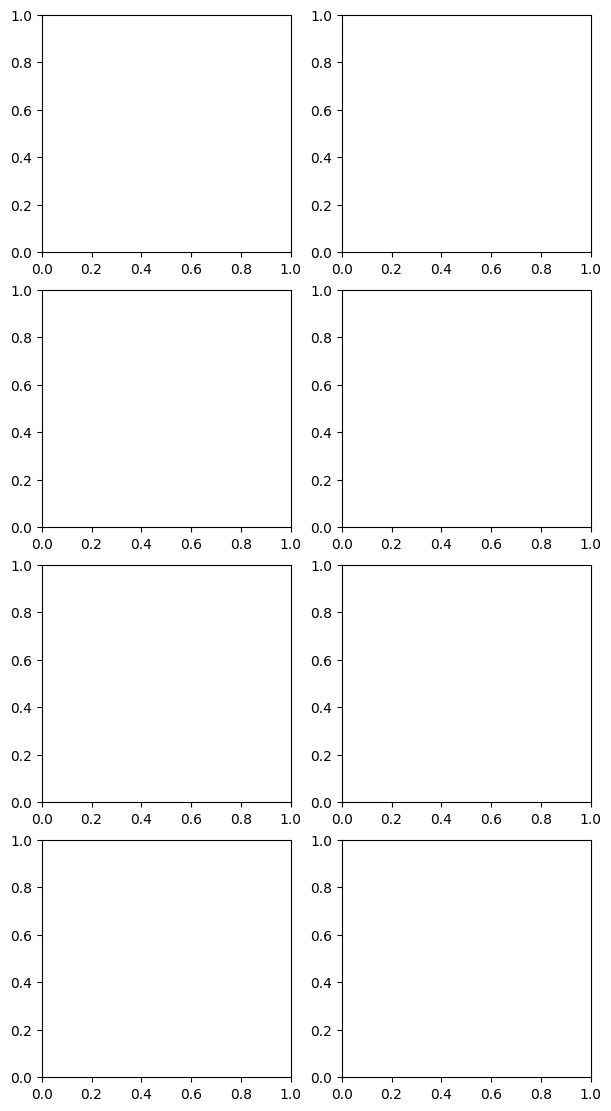

In [11]:
questions = 1000
agents = 50
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)
confusion_uncertainty_covariance = 0.02*np.array([[1,0],[0,0.1]])

fig, ax = plt.subplots(4,2, figsize=(6,11), constrained_layout=True)

for i in range(4):
    running_vals = []
    ensemble_responses_list = []
    confusion = []
    uncertainty = []
    for j in tqdm.tqdm(range(100)):
        rotated_confusion_uncertainty_covariance = rotation(i*theta)@confusion_uncertainty_covariance@rotation(i*theta).T
        confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, rotated_confusion_uncertainty_covariance, questions), 0, 1)
        exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
        ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
        ensemble_responses = ensemble.take_exam(exam)
        values = [ensemble.vote_count(ensemble.vote(ensemble_responses, thresh)) for thresh in np.linspace(0, 1, thresholds)]
        running_vals.append(values)
        ensemble_responses_list.append(ensemble_responses)
        confusion.append(confusion_uncertainty[:,0])
        uncertainty.append(confusion_uncertainty[:,1])
        
    # # Sample data
    # confusion = list(np.array(confusion).flatten())
    # uncertainty = list(np.array(uncertainty).flatten())
    # confusion = sm.add_constant(confusion)
    # model = sm.OLS(uncertainty, confusion).fit()

    # Print the summary
    # print(model.summary())
    # r2 = model.rsquared

    mean_values = np.mean(np.array(running_vals), axis=0)

    confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
    confidence_mean = np.nanmean(confidence, axis=0)

    confidence_std = np.nanstd(confidence, axis=0)

    single_model_confidence = np.mean(np.where(np.array(ensemble_responses_list) == 1, 1, 0))
    single_model_confidence_std = np.std(np.where(np.array(ensemble_responses_list) == 1, 1, 0))

    ax[i,0].scatter(confusion_uncertainty[:,0], confusion_uncertainty[:,1], s=1, c='k', alpha=0.2)
    ax[i,0].set_xlabel('confusion')
    ax[i,0].set_ylabel('uncertainty')
    ax[i,0].set_xlim([0, 1])
    ax[i,0].set_ylim([0, 1])
    # ax[i,0].text(0.5, 0.9, f'$R^2 = ${r2:.2f}', horizontalalignment='center', verticalalignment='center', transform=ax[i,0].transAxes)
    # ax[i,0].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

    ax[i,1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='ensemble')
    ax[i,1].set_ylabel('confidence')
    ax[i,1].set_ylim([-0.1, 1.1])
    ax[i,1].set_xlabel('threshold')
    ax[i,1].set_xlim([0, thresholds])
    ax[i,1].set_xticks([0, thresholds])
    ax[i,1].set_yticks([0,0.25,0.5,0.75,1])
    ax[i,1].fill_between(np.arange(thresholds),
                    confidence_mean - confidence_std,
                    confidence_mean + confidence_std,
                    color=[0.95,0.95,0.95], alpha=1, linewidth=0)
    ax[i,1].axhline(y=single_model_confidence, color=[0.9,0.5,0.5], linestyle=':', label='single agent')
    ax[i,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9], fontsize=9)

In [3]:
questions = 10000
agents = 50
thresholds = agents
competence = (1, 1)
confusion_uncertainty_mean = (0.5,0.5)

def rotation(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
theta = np.pi/4

def compute_confidence_for_covmats(questions, agents, covmats, repeats=10, minimum_count=10):
    confidences = []
    rsquared = []
    for covmat in tqdm.tqdm(covmats):
        running_vals = []
        confusion = []
        uncertainty = []
        for j in range(repeats):
            confusion_uncertainty_covariance = covmat
            confusion_uncertainty = np.clip(np.random.multivariate_normal(confusion_uncertainty_mean, confusion_uncertainty_covariance, questions), 0, 1)
            exam = Exam(questions, confusions = confusion_uncertainty[:,0], uncertainties = confusion_uncertainty[:,1])
            ensemble = Ensemble(n_agents = agents, competencies = np.random.uniform(competence[0], competence[1], agents))
            ensemble_responses = ensemble.take_exam(exam)
            values = [ensemble.vote_count(ensemble.vote(ensemble_responses, thresh)) for thresh in np.linspace(0, 1, thresholds)]
            running_vals.append(values)
            # ensemble_responses_list.append(ensemble_responses)
            confusion.append(confusion_uncertainty[:,0])
            uncertainty.append(confusion_uncertainty[:,1])
            
        confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
        confidence_mean = np.nanmean(confidence, axis=0)
        
        mask = np.where(np.sum(np.array(running_vals)[:,:,0], axis=0) + np.sum(np.array(running_vals)[:,:,2], axis=0) >= minimum_count, 1, float('nan')).squeeze()
        confidence_mean = mask * confidence_mean
        confidences.append(confidence_mean)
        
        # Sample data
        confusion = list(np.array(confusion).flatten())
        uncertainty = list(np.array(uncertainty).flatten())
        confusion = sm.add_constant(confusion)
        model = sm.OLS(uncertainty, confusion).fit()
        rsquared.append(model.rsquared)
    return confidences, rsquared

In [382]:
covmats_list = [0.01*np.array([[1,0.1 * i],[0.1 * i,1]]) for i in range(10)]
confidences, rsquareds = compute_confidence_for_covmats(questions, agents, covmats_list, repeats=1, minimum_count=20)

  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_1319319/4129860470.py:26: RuntimeWarning: invalid value encountered in divide
  confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
/tmp/ipykernel_1319319/4129860470.py:27: RuntimeWarning: Mean of empty slice
  confidence_mean = np.nanmean(confidence, axis=0)
100%|██████████| 10/10 [02:55<00:00, 17.54s/it]


(0.0, 1.1)

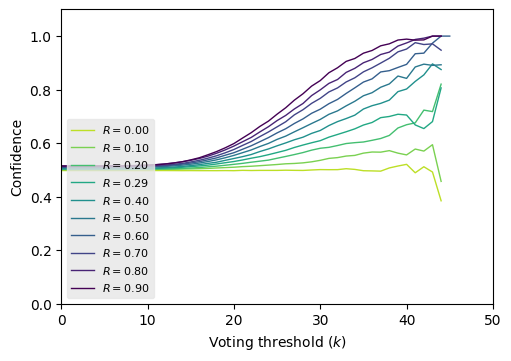

In [383]:
cmap = plt.get_cmap('viridis_r', len(confidences)+1)

fig, ax = plt.subplots(1,1, figsize=(5,3.5), constrained_layout=True)
for i in range(len(confidences)):
    ax.plot(confidences[i], label = f'$R = ${np.sqrt(rsquareds[i]):.2f}', color=cmap(i+1), linewidth=1)
    
# ax.hlines(0.25, 0, agents, color='k', linestyle=':', linewidth=1, label='$a = 1$')

xvals = [30 for i in range(len(confidences))]


ax.set_xlabel('Voting threshold ($k$)')
ax.set_ylabel('Confidence')
ax.set_xlim([0, agents])
lines = ax.get_lines()
# labelLines(lines, xvals=xvals, align=True, fontsize=8)
ax.legend(loc = 'lower left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9], fontsize=8)
    
# ax.set_title('$\\delta = 0.4$')

ax.set_ylim([0, 1.1])

In [216]:
thetas = np.linspace(np.pi/4, -np.pi/4, 10)
covmats_list = [rotation(theta)@(0.02*np.array([[1,0],[0,0.1]]))@rotation(theta).T for theta in thetas]
confidences, rsquareds = compute_confidence_for_covmats(questions, agents, covmats_list, repeats=10)

  0%|          | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_1319319/565938321.py:26: RuntimeWarning: invalid value encountered in divide
  confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
/tmp/ipykernel_1319319/565938321.py:27: RuntimeWarning: Mean of empty slice
  confidence_mean = np.nanmean(confidence, axis=0)
100%|██████████| 10/10 [00:17<00:00,  1.70s/it]


(0.0, 1.1)

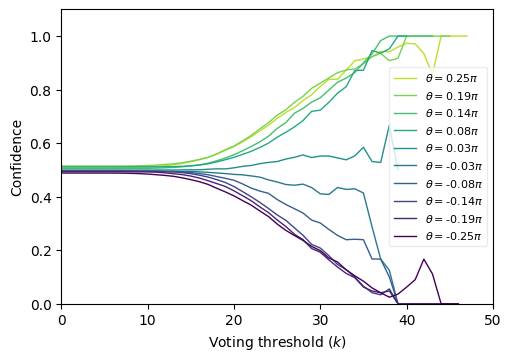

In [230]:
cmap = plt.get_cmap('viridis_r', len(confidences)+1)

eigs = [np.linalg.eig(covmat)[1] for covmat in covmats_list]

fig, ax = plt.subplots(1,1, figsize=(5,3.5), constrained_layout=True)
for i in range(len(confidences)):
    ax.plot(confidences[i], label = f'$\\theta = ${thetas[i]/np.pi:.2f}$\\pi$', color=cmap(i+1), linewidth=1)
    
# ax.hlines(0.25, 0, agents, color='k', linestyle=':', linewidth=1, label='$a = 1$')

xvals = [30 for i in range(len(confidences))]


ax.set_xlabel('Voting threshold ($k$)')
ax.set_ylabel('Confidence')
ax.set_xlim([0, agents])
lines = ax.get_lines()
# labelLines(lines, xvals=xvals, align=True, fontsize=8)
# ax.legend(frameon = True, facecolor = [1, 1, 1], edgecolor = [0.9, 0.9, 0.9], fontsize=8, loc=)
    
# ax.set_title('$\\delta = 0.4$')

ax.set_ylim([0, 1.1])

In [4]:
questions = 500000
# questions = 1000

In [14]:
thetas = np.linspace(np.pi/4, -np.pi/4, 7)
covmats_list = [rotation(theta)@(0.04*np.array([[1,0],[0,0.1]]))@rotation(theta).T for theta in thetas]
confidences, rsquareds = compute_confidence_for_covmats(questions, agents, covmats_list, repeats=1, minimum_count=50)
scatters = [np.clip(np.random.multivariate_normal((0.5,0.5), covmat, questions), 0, 1) for covmat in covmats_list]

# Create a figure and a gridspec
fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(3, len(scatters))
cmap = plt.get_cmap('viridis_r', len(confidences))

ax0 = fig.add_subplot(gs[1:, :])  # Span the entire first row
ax1 = [fig.add_subplot(gs[0, i]) for i in range(len(scatters))]  # Create 10 subplots in the second row

# Plot data on each subplot
for i in range(len(confidences)):
    ax0.plot(confidences[i], label = f'$R = ${np.sqrt(rsquareds[i]) * np.sign(thetas[i]):.2f}', color=cmap(i), linewidth=1)
ax0.set_xlabel('Voting threshold ($k$)')
ax0.set_ylabel('Confidence')
ax0.set_xlim([0, agents])
ax0.set_ylim([-0.1, 1.1])
ax0.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax0.axhline(y=0.25, color='k', linestyle=':', label='single agent')

    
for i in range(len(ax1)):
    s = scatters[i]
    ax1[i].scatter(s[::1000,0], s[::1000,1], s=1, alpha=0.1, color=cmap(i))
    ax1[i].set_xlim([0, 1])
    ax1[i].set_ylim([0, 1])
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])
    ax1[i].set_aspect('equal')
    # ax1[i].set_title(f'$R = ${np.sqrt(rsquareds[i]):.2f}')
    ax1[i].text(0.5, 0.1, f'$\\rho = ${np.sqrt(rsquareds[i]):.2f}', horizontalalignment='center', verticalalignment='center', transform=ax1[i].transAxes, fontsize=9)
    
ax1[0].set_xlabel('Confusion')
ax1[0].set_ylabel('Uncertainty')
ax1[0].xaxis.set_label_position('top')
ax1[1].annotate('', xy=(0, 1.1), xycoords='axes fraction', xytext=(len(scatters)-0.7, 1.1), 
            arrowprops=dict(arrowstyle="<-", color='k'))

plt.subplots_adjust(wspace=0.05, hspace=0.1)
# plt.show()

# plt.savefig('ensemble_confidence_tilt.pdf', bbox_inches='tight')

  0%|          | 0/7 [00:31<?, ?it/s]


KeyboardInterrupt: 

100%|██████████| 7/7 [09:56<00:00, 85.28s/it]


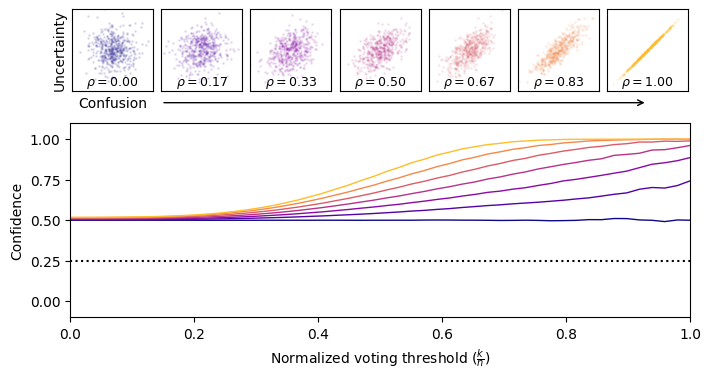

In [15]:
covmats_list = [0.02*np.array([[1,i],[i,1]]) for i in np.linspace(0, 1, 7)]
confidences, rsquareds = compute_confidence_for_covmats(questions, agents, covmats_list, repeats=1)
scatters = [np.clip(np.random.multivariate_normal((0.5,0.5), covmat, questions), 0, 1) for covmat in covmats_list]


# Create a figure and a gridspec
fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(3, len(scatters))
# cmap = plt.get_cmap('viridis_r', len(confidences))
cmap = plt.get_cmap('plasma', len(confidences)+1)


# Create subplots with varying sizes
# ax0 = fig.add_subplot(gs[0:2, :])
# ax1 = [fig.add_subplot(gs[2, i]) for i in range(len(scatters))]

ax0 = fig.add_subplot(gs[1:, :])  # Span the entire first row
ax1 = [fig.add_subplot(gs[0, i]) for i in range(len(scatters))]  # Create 10 subplots in the second row

# Plot data on each subplot
for i in range(len(confidences)):
    ax0.plot(np.linspace(0,1,len(confidences[0])), confidences[i], label = f'$R = ${np.sqrt(rsquareds[i]):.2f}', color=cmap(i), linewidth=1)
ax0.set_xlabel('Normalized voting threshold ($\\frac{k}{n}$)')
ax0.set_ylabel('Confidence')
ax0.set_xlim([0, 1])
ax0.set_ylim([-0.1, 1.1])
ax0.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax0.axhline(y=0.25, color='k', linestyle=':', label='single agent')

    
for i in range(len(ax1)):
    s = scatters[i]
    ax1[i].scatter(s[::1000,0], s[::1000,1], s=1, alpha=0.1, color=cmap(i))
    ax1[i].set_xlim([0, 1])
    ax1[i].set_ylim([0, 1])
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])
    ax1[i].set_aspect('equal')
    # ax1[i].set_title(f'$R = ${np.sqrt(rsquareds[i]):.2f}')
    ax1[i].text(0.5, 0.1, f'$\\rho = ${np.sqrt(rsquareds[i]):.2f}', horizontalalignment='center', verticalalignment='center', transform=ax1[i].transAxes, fontsize=9)
    
ax1[0].set_xlabel('Confusion')
ax1[0].set_ylabel('Uncertainty')

ax1[1].annotate('', xy=(0, -0.15), xycoords='axes fraction', xytext=(len(scatters)-1, -0.15), 
            arrowprops=dict(arrowstyle="<-", color='k'))

plt.subplots_adjust(wspace=0.05, hspace=0.4)
# plt.show()

plt.savefig('ensemble_confidence_strength.pdf', bbox_inches='tight')

 14%|█▍        | 1/7 [01:23<08:19, 83.23s/it]/tmp/ipykernel_2004237/2182131352.py:30: RuntimeWarning: invalid value encountered in divide
  confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
/tmp/ipykernel_2004237/2182131352.py:31: RuntimeWarning: Mean of empty slice
  confidence_mean = np.nanmean(confidence, axis=0)
100%|██████████| 7/7 [09:38<00:00, 82.63s/it]


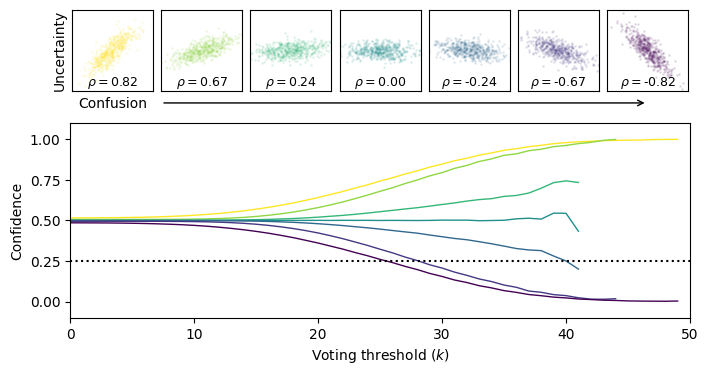

In [5]:
thetas = np.linspace(np.sqrt(np.pi/4), -np.sqrt(np.pi/4), 7)
thetas = thetas**2 * np.sign(thetas)
covmats_list = [rotation(theta)@(0.04*np.array([[1,0],[0,0.1]]))@rotation(theta).T for theta in thetas]
confidences, rsquareds = compute_confidence_for_covmats(questions, agents, covmats_list, repeats=1, minimum_count=50)
scatters = [np.clip(np.random.multivariate_normal((0.5,0.5), covmat, questions), 0, 1) for covmat in covmats_list]

# Create a figure and a gridspec
fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(3, len(scatters))
cmap = plt.get_cmap('viridis_r', len(confidences))

# Create subplots with varying sizes
# ax0 = fig.add_subplot(gs[0:2, :])
# ax1 = [fig.add_subplot(gs[2, i]) for i in range(len(scatters))]

ax0 = fig.add_subplot(gs[1:, :])  # Span the entire first row
ax1 = [fig.add_subplot(gs[0, i]) for i in range(len(scatters))]  # Create 10 subplots in the second row

# Plot data on each subplot
for i in range(len(confidences)):
    ax0.plot(confidences[i], label = f'$R = ${np.sqrt(rsquareds[i]) * np.sign(thetas[i]):.2f}', color=cmap(i), linewidth=1)
ax0.set_xlabel('Voting threshold ($k$)')
ax0.set_ylabel('Confidence')
ax0.set_xlim([0, agents])
ax0.set_ylim([-0.1, 1.1])
ax0.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax0.axhline(y=0.25, color='k', linestyle=':', label='single agent')

    
for i in range(len(ax1)):
    s = scatters[i]
    ax1[i].scatter(s[::1000,0], s[::1000,1], s=1, alpha=0.1, color=cmap(i))
    ax1[i].set_xlim([0, 1])
    ax1[i].set_ylim([0, 1])
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])
    ax1[i].set_aspect('equal')
    # ax1[i].set_title(f'$R = ${np.sqrt(rsquareds[i]):.2f}')
    ax1[i].text(0.5, 0.1, f'$\\rho = ${np.sqrt(rsquareds[i]) * np.sign(thetas[i]):.2f}', horizontalalignment='center', verticalalignment='center', transform=ax1[i].transAxes, fontsize=9)
    
ax1[0].set_xlabel('Confusion')
ax1[0].set_ylabel('Uncertainty')

ax1[1].annotate('', xy=(0, -0.15), xycoords='axes fraction', xytext=(len(scatters)-1, -0.15), 
            arrowprops=dict(arrowstyle="<-", color='k'))

plt.subplots_adjust(wspace=0.05, hspace=0.4)
# plt.show()

plt.savefig('ensemble_confidence_tilt.pdf', bbox_inches='tight')

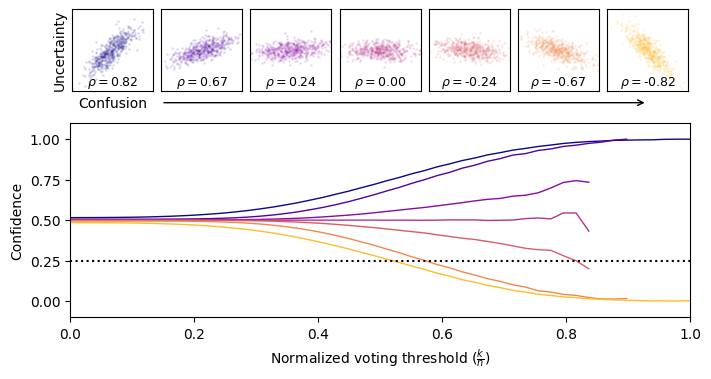

In [6]:
# Create a figure and a gridspec
fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(3, len(scatters))
cmap = plt.get_cmap('plasma', len(confidences)+1)

# Create subplots with varying sizes
# ax0 = fig.add_subplot(gs[0:2, :])
# ax1 = [fig.add_subplot(gs[2, i]) for i in range(len(scatters))]

ax0 = fig.add_subplot(gs[1:, :])  # Span the entire first row
ax1 = [fig.add_subplot(gs[0, i]) for i in range(len(scatters))]  # Create 10 subplots in the second row

# Plot data on each subplot
for i in range(len(confidences)):
    ax0.plot(np.linspace(0,1,len(confidences[0])), confidences[i], label = f'$R = ${np.sqrt(rsquareds[i]):.2f}', color=cmap(i), linewidth=1)
ax0.set_xlabel('Normalized voting threshold ($\\frac{k}{n}$)')
ax0.set_ylabel('Confidence')
ax0.set_xlim([0, 1])
ax0.set_ylim([-0.1, 1.1])
ax0.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax0.axhline(y=0.25, color='k', linestyle=':', label='single agent')

    
for i in range(len(ax1)):
    s = scatters[i]
    ax1[i].scatter(s[::1000,0], s[::1000,1], s=1, alpha=0.1, color=cmap(i))
    ax1[i].set_xlim([0, 1])
    ax1[i].set_ylim([0, 1])
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])
    ax1[i].set_aspect('equal')
    # ax1[i].set_title(f'$R = ${np.sqrt(rsquareds[i]):.2f}')
    ax1[i].text(0.5, 0.1, f'$\\rho = ${np.sqrt(rsquareds[i]) * np.sign(thetas[i]):.2f}', horizontalalignment='center', verticalalignment='center', transform=ax1[i].transAxes, fontsize=9)
    
ax1[0].set_xlabel('Confusion')
ax1[0].set_ylabel('Uncertainty')

ax1[1].annotate('', xy=(0, -0.15), xycoords='axes fraction', xytext=(len(scatters)-1, -0.15), 
            arrowprops=dict(arrowstyle="<-", color='k'))

plt.subplots_adjust(wspace=0.05, hspace=0.4)
# plt.show()

plt.savefig('ensemble_confidence_tilt.pdf', bbox_inches='tight')